In [24]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

# <font face="gotham" color="purple"> What Is Panel Data? </font>

**Panel data** is a hybrid data type that has feature of both _cross section_ and _time series_. Actually panel data are the most common data type in industry, for instance a car manufacturer has record of its suppliers' price level over time, a bank has full history of its clients' monthly balance for many years. Needless to say, to carry out serious researches, you must use panel data.


Here we will use the data from "Why has Productivity Declined? Productivity and Public Investment" written by Munell, A.

Variable names defined as below:
```
STATE = state name
ST_ABB = state abbreviation
YR = 1970,...,1986
P_CAP = public capital
HWY = highway capital
WATER = water utility capital
UTIL = utility capital
PC = private capital
GSP = gross state product
EMP = employment
UNEMP = unemployment rate
```

In [8]:
df = pd.read_excel('Basic_Econometrics_practice_data.xlsx', sheet_name = 'Prod_PubInvestment')
df.head(5)

,STATE,YR,P_CAP,HWY,WATER,UTIL,PC,GSP,EMP,UNEMP
0,ALABAMA,1970,15032.67,7325.80,1655.68,6051.20,35793.80,28418,1010.5,4.7
1,ALABAMA,1971,15501.94,7525.94,1721.02,6254.98,37299.91,29375,1021.9,5.2
2,ALABAMA,1972,15972.41,7765.42,1764.75,6442.23,38670.30,31303,1072.3,4.7
3,ALABAMA,1973,16406.26,7907.66,1742.41,6756.19,40084.01,33430,1135.5,3.9
4,ALABAMA,1974,16762.67,8025.52,1734.85,7002.29,42057.31,33749,1169.8,5.5


In [9]:
df.tail(5)

,STATE,YR,P_CAP,HWY,WATER,UTIL,PC,GSP,EMP,UNEMP
811,WYOMING,1982,4731.98,3060.64,408.43,1262.90,27724.96,13056,217.7,5.8
812,WYOMING,1983,4950.82,3119.98,445.59,1385.25,28586.46,11922,202.5,8.4
813,WYOMING,1984,5184.73,3195.68,476.57,1512.48,28794.80,12073,204.3,6.3
814,WYOMING,1985,5448.38,3295.92,523.01,1629.45,29326.94,12022,206.9,7.1
815,WYOMING,1986,5700.41,3400.96,565.58,1733.88,27110.51,10870,196.3,9


Each state is recorded over time in several aspects, such as public capitals, highway capital, water facility capital and etc. If each state is recorded in equal length of time period, we call it **balanced panel**, otherwise **unbalanced panel**.

Estimation methods includes four approaches
1. Pooled OLS model
2. Fixed effects least square dummy variable (LSDV) model
3. Fixed effects within-in group model
4. Random effects model

# <font face="gotham" color="purple">Pooled OLS Regression </font>

\begin{aligned}
ln{GSP}_{i t} &=\beta_{1}+\beta_{2} \ln{PCAP}_{i t}+\beta_{3}  \ln{HWY}_{i t}+\beta_{4} \ln{WATER}_{i t}+\beta_{5} \ln{UTIL}_{i t}+\beta_{6} \ln{EMP}_{i t}+u_{i t}
\end{aligned}
where $i$ means the $i$the state, $t$ means time period.

In [23]:
model = smf.ols(formula='np.log(GSP) ~ np.log(P_CAP) + np.log(PC) + np.log(HWY) + np.log(WATER) + np.log(UTIL) + np.log(EMP)', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(GSP)   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.971e+04
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:39:33   Log-Likelihood:                 862.28
No. Observations:                 816   AIC:                            -1711.
Df Residuals:                     809   BIC:                            -1678.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2474      0.111     11.245

The common symptoms of pooled regression on panel data is that all most of coefficients will be highly significant and also $R^2$ is exceedingly high. However, we can still spot some problems, the conditional number is high, meaning multicollinearity and Durbin-Watson test is close to $0$ meaning autocorrelation or specification error.

But the most prominent issue of this model is that it camouflages the heterogeneity that may exist among states. The heterogeneity of each state is subsumed by the disturbance term, which causes correlation between independent variables and disturbance terms, therefore OLS estimates are bound to be biased and inconsistent.

# <font face="gotham" color="purple">The Fixed Effect LSDV Model</font>

LSDV model allows heterogeneity to take part in by adding different intercept value

\begin{aligned}
ln{GSP}_{i t} &=\beta_{1i}+\beta_{2} \ln{PCAP}_{i t}+\beta_{3}  \ln{HWY}_{i t}+\beta_{4} \ln{WATER}_{i t}+\beta_{5} \ln{UTIL}_{i t}+\beta_{6} \ln{EMP}_{i t}+u_{i t}
\end{aligned}

$\beta_{1i}$ represents the intercept for each state $i$. There are various possible reasons contributing to heterogeneity among states, such as population, average education level and urbanization rate, etc.

_Fixed effect_ means that though each state has its own intercept, but it is **time-invariant**, i.e. constant over the time. If we assume **time-variant** intercept, the notation would be $\beta_{1it}$

In [25]:
df

,STATE,YR,P_CAP,HWY,WATER,UTIL,PC,GSP,EMP,UNEMP
0,ALABAMA,1970,15032.67,7325.80,1655.68,6051.20,35793.80,28418,1010.5,4.7
1,ALABAMA,1971,15501.94,7525.94,1721.02,6254.98,37299.91,29375,1021.9,5.2
2,ALABAMA,1972,15972.41,7765.42,1764.75,6442.23,38670.30,31303,1072.3,4.7
3,ALABAMA,1973,16406.26,7907.66,1742.41,6756.19,40084.01,33430,1135.5,3.9
4,ALABAMA,1974,16762.67,8025.52,1734.85,7002.29,42057.31,33749,1169.8,5.5
...,...,...,...,...,...,...,...,...,...,...
811,WYOMING,1982,4731.98,3060.64,408.43,1262.90,27724.96,13056,217.7,5.8
812,WYOMING,1983,4950.82,3119.98,445.59,1385.25,28586.46,11922,202.5,8.4
813,WYOMING,1984,5184.73,3195.68,476.57,1512.48,28794.80,12073,204.3,6.3
814,WYOMING,1985,5448.38,3295.92,523.01,1629.45,29326.94,12022,206.9,7.1


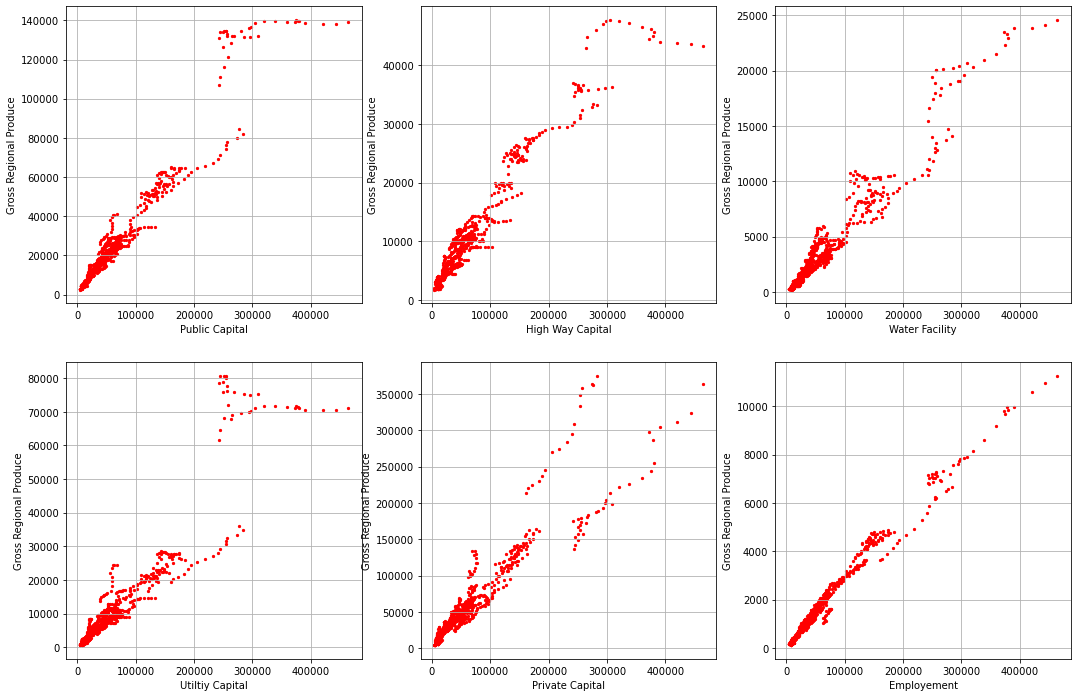

In [44]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (18, 12))
ax[0, 0].scatter(df['GSP'], df['P_CAP'], c ='r', s = 5)
ax[0, 0].grid()
ax[0, 0].set_xlabel('Public Capital')
ax[0, 0].set_ylabel('Gross Regional Produce')

ax[0, 1].scatter(df['GSP'], df['HWY'], c ='r', s = 5)
ax[0, 1].grid()
ax[0, 1].set_xlabel('High Way Capital')
ax[0, 1].set_ylabel('Gross Regional Produce')

ax[0, 2].scatter(df['GSP'], df['WATER'], c ='r', s = 5)
ax[0, 2].grid()
ax[0, 2].set_xlabel('Water Facility')
ax[0, 2].set_ylabel('Gross Regional Produce')

ax[1, 0].scatter(df['GSP'], df['UTIL'], c ='r', s = 5)
ax[1, 0].grid()
ax[1, 0].set_xlabel('Utiltiy Capital')
ax[1, 0].set_ylabel('Gross Regional Produce')

ax[1, 1].scatter(df['GSP'], df['PC'], c ='r', s = 5)
ax[1, 1].grid()
ax[1, 1].set_xlabel('Private Capital')
ax[1, 1].set_ylabel('Gross Regional Produce')

ax[1, 2].scatter(df['GSP'], df['EMP'], c ='r', s = 5)
ax[1, 2].grid()
ax[1, 2].set_xlabel('Employement')
ax[1, 2].set_ylabel('Gross Regional Produce')

plt.show()

Check how many states are there in the panel data

In [59]:
print(df['STATE'].unique())
print(len(df['STATE'].unique()))

['ALABAMA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO' 'CONNECTICUT'
 'DELAWARE' 'FLORIDA' 'GEORGIA' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA'
 'KANSAS' 'KENTUCKY' 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS'
 'MICHIGAN' 'MINNESOTA' 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA'
 'NEVADA' 'NEW_HAMPSHIRE' 'NEW_JERSEY' 'NEW_MEXICO' 'NEW_YORK'
 'NORTH_CAROLINA' 'NORTH_DAKOTA' 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA'
 'RHODE_ISLAND' 'SOUTH_CAROLINA' 'SOUTH_DAKOTA' 'TENNESSE' 'TEXAS' 'UTAH'
 'VERMONT' 'VIRGINIA' 'WASHINGTON' 'WEST_VIRGINIA' 'WISCONSIN' 'WYOMING']
48


To avoid dummy variable trap, we can define $47$ dummy intercepts.

Add dummies onto the intercept

\begin{aligned}
ln{GSP}_{i t} &=\alpha_{1}+ \sum_{j=2}^{48}\alpha_{j} D_{j i}+\beta_{2} \ln{PCAP}_{i t}+\beta_{3}  \ln{HWY}_{i t}+\beta_{4} \ln{WATER}_{i t}+\beta_{5} \ln{UTIL}_{i t}+\beta_{6} \ln{EMP}_{i t}+u_{i t}
\end{aligned}


Use ```STATE``` as the dummy column and add ```drop_fist``` to avoid dummy trap.

In [62]:
df_dum = pd.get_dummies(data = df, columns = ['STATE'], drop_first=True)

In [72]:
df_dum

,YR,P_CAP,HWY,WATER,UTIL,PC,GSP,EMP,UNEMP,STATE_ARIZONA,...,STATE_SOUTH_DAKOTA,STATE_TENNESSE,STATE_TEXAS,STATE_UTAH,STATE_VERMONT,STATE_VIRGINIA,STATE_WASHINGTON,STATE_WEST_VIRGINIA,STATE_WISCONSIN,STATE_WYOMING
0,1970,15032.67,7325.80,1655.68,6051.20,35793.80,28418,1010.5,4.7,0,...,0,0,0,0,0,0,0,0,0,0
1,1971,15501.94,7525.94,1721.02,6254.98,37299.91,29375,1021.9,5.2,0,...,0,0,0,0,0,0,0,0,0,0
2,1972,15972.41,7765.42,1764.75,6442.23,38670.30,31303,1072.3,4.7,0,...,0,0,0,0,0,0,0,0,0,0
3,1973,16406.26,7907.66,1742.41,6756.19,40084.01,33430,1135.5,3.9,0,...,0,0,0,0,0,0,0,0,0,0
4,1974,16762.67,8025.52,1734.85,7002.29,42057.31,33749,1169.8,5.5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1982,4731.98,3060.64,408.43,1262.90,27724.96,13056,217.7,5.8,0,...,0,0,0,0,0,0,0,0,0,1
812,1983,4950.82,3119.98,445.59,1385.25,28586.46,11922,202.5,8.4,0,...,0,0,0,0,0,0,0,0,0,1
813,1984,5184.73,3195.68,476.57,1512.48,28794.80,12073,204.3,6.3,0,...,0,0,0,0,0,0,0,0,0,1
814,1985,5448.38,3295.92,523.01,1629.45,29326.94,12022,206.9,7.1,0,...,0,0,0,0,0,0,0,0,0,1
